# Sex Distribution in STEM Majors

## Fernando Mazzoni
## June 5th 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import *

%matplotlib inline

# Background

Using "Bachelors’ Degrees by Major and Sex, Massachusetts, 2015-2016"
by The National Center for Education Statistics

In [2]:
Dataset = pd.read_csv("bachelors_major_ma_2015_16.csv")

In [3]:
Dataset[:5]

,UnitID,Institution Name,City location of institution (HD2015),Institution open to the general public (HD2015),Applicants total (ADM2015_RV),Admissions total (ADM2015_RV),Enrolled total (ADM2015_RV),Unnamed: 7,Grand total (C2016_A First major Agriculture Agriculture Operations and Related Sciences Bachelor's degree),Grand total men (C2016_A First major Agriculture Agriculture Operations and Related Sciences Bachelor's degree),...,Grand total women (C2016_A First major Health Professions and Related Programs Bachelor's degree),Grand total (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total men (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total women (C2016_A First major Business Management Marketing and Related Support Services Bachelor's degree),Grand total (C2016_A First major History Bachelor's degree),Grand total men (C2016_A First major History Bachelor's degree),Grand total women (C2016_A First major History Bachelor's degree),Grand total (C2016_A First major Grand total Bachelor's degree),Grand total men (C2016_A First major Grand total Bachelor's degree),Grand total women (C2016_A First major Grand total Bachelor's degree)
0,419147,Ailano School of Cosmetology,Brockton,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,476735,Alexander Academy,Fitchburg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,487144,American Academy of Personal Training-Boston C...,Boston,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,164447,American International College,Springfield,1.0,2060.0,1301.0,355.0,NaN,NaN,NaN,...,85.0,45.0,33.0,12.0,3.0,3.0,0.0,279.0,111.0,168.0
4,164465,Amherst College,Amherst,1.0,8568.0,1210.0,477.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,17.0,12.0,432.0,224.0,208.0


The following shows the sex distribution of Massachusetts college students in stem fields 

Particulary Engineering, Physical Sciences, and Math majors are sampled 

In [4]:
Major = Dataset[['Institution Name','Enrolled total (ADM2015_RV)',"Grand total men (C2016_A  First major  Engineering  Bachelor's degree)","Grand total women (C2016_A  First major  Engineering  Bachelor's degree)","Grand total men (C2016_A  First major  Physical Sciences  Bachelor's degree)","Grand total women (C2016_A  First major  Physical Sciences  Bachelor's degree)", "Grand total men (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)","Grand total women (C2016_A  First major  Mathematics and Statistics  Bachelor's degree)"]]
Major = Major.dropna()

Major.describe()

,Enrolled total (ADM2015_RV),Grand total men (C2016_A First major Engineering Bachelor's degree),Grand total women (C2016_A First major Engineering Bachelor's degree),Grand total men (C2016_A First major Physical Sciences Bachelor's degree),Grand total women (C2016_A First major Physical Sciences Bachelor's degree),Grand total men (C2016_A First major Mathematics and Statistics Bachelor's degree),Grand total women (C2016_A First major Mathematics and Statistics Bachelor's degree)
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,1550.687500,164.312500,63.000000,22.62500,16.125000,26.062500,14.875000
std,1226.493306,175.746681,73.965758,23.38625,13.744696,34.607261,16.280356
min,114.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,800.750000,14.500000,3.750000,6.00000,6.000000,3.000000,4.500000
50%,1347.000000,103.000000,35.000000,15.00000,11.500000,12.000000,10.000000
75%,1665.000000,294.000000,80.750000,31.75000,28.250000,31.500000,14.750000
max,4702.000000,519.000000,232.000000,76.00000,39.000000,125.000000,57.000000


In [5]:
#TEST CELL
unis = Major[0 :1]
for x in range(len(Major)):
    unis = np.vstack((unis , Major[x+1 :(x+2 )] ))

print(unis)

[["Bard College at Simon's Rock" 117.0 3.0 1.0 1.0 1.0 3.0 2.0]
 ['Boston University' 3629.0 276.0 101.0 43.0 33.0 57.0 41.0]
 ['Eastern Nazarene College' 114.0 4.0 0.0 1.0 0.0 0.0 1.0]
 ['Harvard University' 1660.0 40.0 37.0 62.0 27.0 125.0 57.0]
 ['Massachusetts Institute of Technology' 1106.0 236.0 232.0 50.0 36.0 58.0
  14.0]
 ['Merrimack College' 828.0 24.0 3.0 3.0 1.0 3.0 10.0]
 ['Northeastern University' 2797.0 519.0 148.0 28.0 24.0 23.0 17.0]
 ['Smith College' 609.0 0.0 33.0 0.0 39.0 0.0 12.0]
 ['Suffolk University' 1334.0 17.0 4.0 8.0 3.0 3.0 0.0]
 ['Tufts University' 1360.0 110.0 60.0 22.0 14.0 13.0 10.0]
 ['University of Massachusetts-Amherst' 4702.0 388.0 74.0 76.0 32.0 70.0
  38.0]
 ['University of Massachusetts-Boston' 1680.0 7.0 1.0 18.0 7.0 11.0 9.0]
 ['University of Massachusetts-Dartmouth' 1430.0 137.0 23.0 9.0 9.0 11.0
  5.0]
 ['University of Massachusetts-Lowell' 1633.0 348.0 62.0 22.0 18.0 20.0 7.0]
 ['Western New England University' 719.0 96.0 21.0 7.0 7.0 2.0 3.0

In [8]:
tot_m_engin = 0
tot_w_engin = 0
tot_engin = 0

tot_m_math = 0
tot_w_math = 0
tot_math = 0

tot_m_phys = 0
tot_w_phys = 0
tot_phys = 0

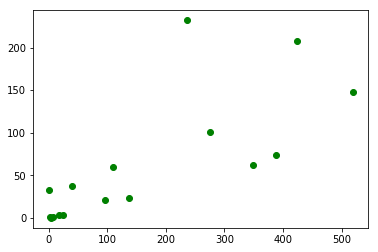

3637.0


In [13]:
for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    loc_engin = m_engin + w_engin
    tot_engin = tot_engin + loc_engin
    
    if m_engin or w_engin > 0:
        plt.plot(m_engin, w_engin , color='green', marker='o')
    
plt.show()   

print(tot_engin)

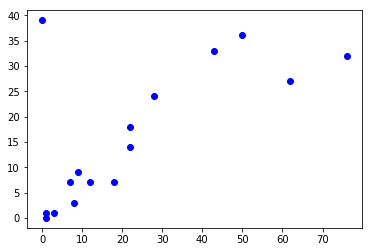

620.0


In [12]:
for i in range(len(unis[:,1])):    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    loc_phys = m_phys + w_phys
    tot_phys = tot_phys + loc_phys
    
    if m_phys or w_phys > 0:
        plt.plot(m_phys, w_phys, color='blue', marker='o')
plt.show()

print(tot_phys)

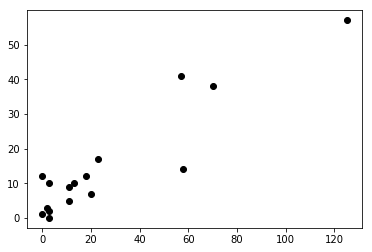

655.0


In [14]:
for i in range(len(unis[:,1])):   
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    loc_math = m_math + w_math
    tot_math = tot_math + loc_math
    if m_math or w_math > 0:
        plt.plot(m_math, w_math , color='black', marker='o')
    
plt.show()

print(tot_math)

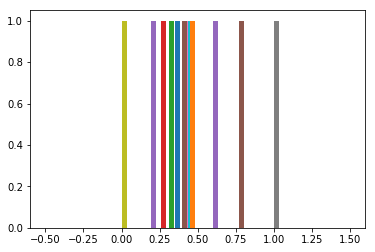

In [30]:


for i in range(len(unis[:,1])):   
    
    
    
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    loc_math = m_math + w_math
    pcent_w = w_math/loc_math

    
        
plt.hist(pcent_w, bins = 30)
plt.show()

In [28]:
plt.hist?

In [13]:
tot_m_engin = 0
tot_w_engin = 0
tot_engin = 0

tot_m_math = 0
tot_w_math = 0
tot_math = 0

tot_m_phys = 0
tot_w_phys = 0
tot_phys = 0

for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    loc_engin = m_engin + w_engin
    tot_engin = tot_engin + loc_engin
    
    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    loc_phys = m_phys + w_phys
    tot_phys = tot_phys + loc_phys
    
    
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    loc_math = m_math + w_math
    tot_math = tot_math + loc_math
    
    """
    plt.plot(enroll, (m_engin + w_engin) , color='green', marker='o')
    plt.plot(enroll, (m_phys + w_phys) , color='blue', marker='o')
    plt.plot(enroll,(m_math + w_math) , color='black', marker='o')
    
    plt.show()"""

print(tot_engin, tot_phys, tot_math)

3637.0 620.0 655.0


# Junk

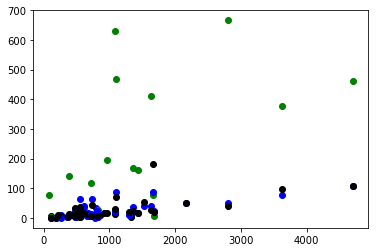

In [25]:
#first trial

for i in range(len(unis[:,1])):
    name = (unis[i,0])
    enroll = (unis[i,1])
   
    m_engin = (unis[i,2])
    w_engin =(unis[i,3])
    
    m_phys = (unis[i,4])
    w_phys =(unis[i,5])
    
    m_math = (unis[i,6])
    w_math = (unis[i,7])
    
    plt.plot(enroll, (m_engin + w_engin) , color='green', marker='o')
    plt.plot(enroll, (m_phys + w_phys) , color='blue', marker='o')
    plt.plot(enroll,(m_math + w_math) , color='black', marker='o')

In [24]:
print(unis[0,:])
print(unis[:,:])

['Ailano School of Cosmetology' nan nan nan nan nan nan nan]
[['Ailano School of Cosmetology' nan nan ..., nan nan nan]
 ['Alexander Academy' nan nan ..., nan nan nan]
 ['American Academy of Personal Training-Boston Campus' nan nan ..., nan
  nan nan]
 ..., 
 ['Williams College' 551.0 nan ..., 38.0 22.0 14.0]
 ['Worcester Polytechnic Institute' 1093.0 424.0 ..., 7.0 18.0 12.0]
 ['Worcester State University' 814.0 nan ..., 8.0 3.0 3.0]]


In [65]:
bu = Major[28:29]
uml = Major[177:178]
uma = Major[173:174]
wpi = Major[189:190]
wit = Major[182:183]

